In [1]:
import numpy as np
import scipy.io as spio
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt

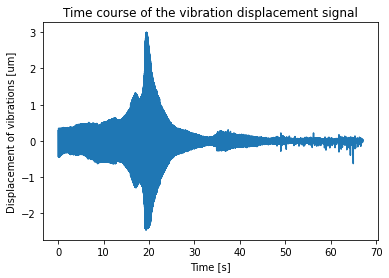

In [2]:
datas = spio.loadmat('rozbieg_wirnik.mat', squeeze_me=True)
VCAP_DATA = datas['VCAP_DATA']
VCAP_SAMPLERATE = (datas['VCAP_SAMPLERATE'])

x = VCAP_DATA[:,0]
z = VCAP_DATA[:,1]
xm = x*(1000/8)

n = len(xm)
t_max = int(n/(VCAP_SAMPLERATE))
t = np.linspace(0,t_max-1/(VCAP_SAMPLERATE), n)

plt.plot(t,x)
plt.title('Time course of the vibration displacement signal')
plt.xlabel('Time [s]')
plt.ylabel('Displacement of vibrations [um]')
plt.show()

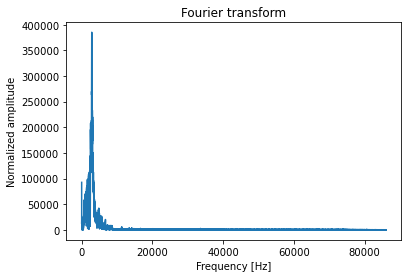

In [3]:
y = abs(fft(xm))
y = y[0:int(n/2)]

plt.plot(y)
plt.title('Fourier transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Normalized amplitude')
plt.show()

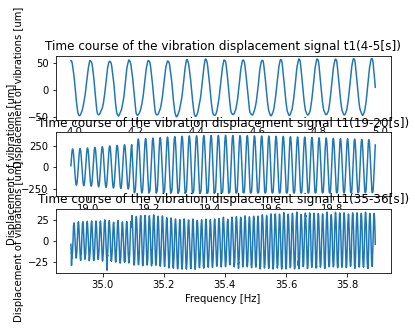

In [4]:
x1 = xm[VCAP_SAMPLERATE*4:VCAP_SAMPLERATE*5]
t1 = t[VCAP_SAMPLERATE*4:VCAP_SAMPLERATE*5]
z1 = z[VCAP_SAMPLERATE*4:VCAP_SAMPLERATE*5]


x2 = xm[VCAP_SAMPLERATE*19:VCAP_SAMPLERATE*20]
t2 = t[VCAP_SAMPLERATE*19:VCAP_SAMPLERATE*20]
z2 = z[VCAP_SAMPLERATE*19:VCAP_SAMPLERATE*20]


x3 = xm[VCAP_SAMPLERATE*35:VCAP_SAMPLERATE*36]
t3 = t[VCAP_SAMPLERATE*35:VCAP_SAMPLERATE*36]
z3 = z[VCAP_SAMPLERATE*35:VCAP_SAMPLERATE*36]

plt.subplot(311)
plt.plot(t1, x1)
plt.title('Time course of the vibration displacement signal t1(4-5[s])')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement of vibrations [um]')

plt.subplot(312)
plt.plot(t2, x2)
plt.title('Time course of the vibration displacement signal t1(19-20[s])')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement of vibrations [um]')

plt.subplot(313)
plt.plot(t3, x3)
plt.title('Time course of the vibration displacement signal t1(35-36[s])')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement of vibrations [um]')
plt.show()

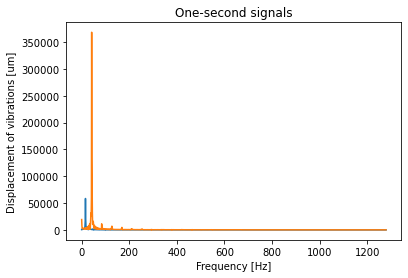

In [5]:
n = len(x1)
f = VCAP_SAMPLERATE*np.arange(0, (n/2))/n

n1 = len(x1)
y1 = abs(fft(x1))
y1 = y1[0:int(n/2)]

n2 = len(x2)
y2 = abs(fft(x2))
y2 = y2[0:int(n/2)]

n3 = len(x3)
y3 = abs(fft(x3))
y3 = y3[0:int(n/2)]

plt.plot(f, y1, f, y2)
plt.title('One-second signals')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement of vibrations [um]')
plt.show()

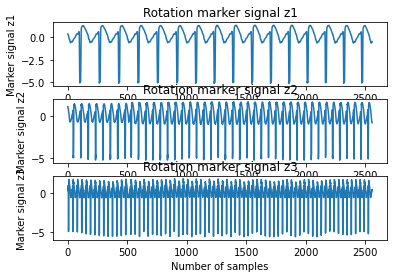

In [6]:
plt.subplot(311)
plt.plot(z1)
plt.title('Rotation marker signal z1')
plt.xlabel('Number of samples')
plt.ylabel('Marker signal z1')

plt.subplot(312)
plt.plot(z2)
plt.title('Rotation marker signal z2')
plt.xlabel('Number of samples')
plt.ylabel('Marker signal z2')

plt.subplot(313)
plt.plot(z3)
plt.title('Rotation marker signal z3')
plt.xlabel('Number of samples')
plt.ylabel('Marker signal z3')
plt.show()

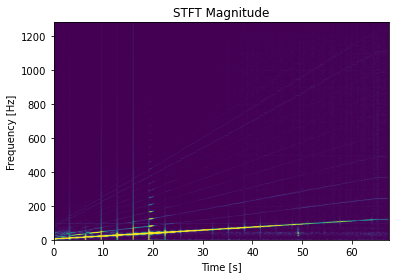

In [7]:
amp = 2 * np.sqrt(2)
f, t, Zxx = signal.stft(xm, VCAP_SAMPLERATE, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.show()